# Lab1

In [286]:
import numpy as np
import matplotlib.pyplot as plt

In [287]:
def plot_graph(x: np.ndarray, y1: np.ndarray, title: str):
    plt.plot(x, y1)
    plt.title(title)
    plt.show()

## Activation functions

In [288]:
a = np.linspace(-10, 10, 16).reshape(4, 4)

1. ReLU 
$$ f(z)=max(0, z) $$
$$ {f}'(z)=\left\{\begin{matrix}
 1 &z>0 \\ 
 0 & z<=0
\end{matrix}\right. $$

In [289]:
def ReLU(arr: np.ndarray) -> np.ndarray:
    return np.maximum(0, arr)

def ReLU_der(arr: np.ndarray) -> np.ndarray:
    return np.where(arr > 0, 1, 0)

In [290]:
ReLU(a)

array([[ 0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.66666667,  2.        ,  3.33333333,  4.66666667],
       [ 6.        ,  7.33333333,  8.66666667, 10.        ]])

In [291]:
ReLU_der(a)

array([[0, 0, 0, 0],
       [0, 0, 0, 0],
       [1, 1, 1, 1],
       [1, 1, 1, 1]])

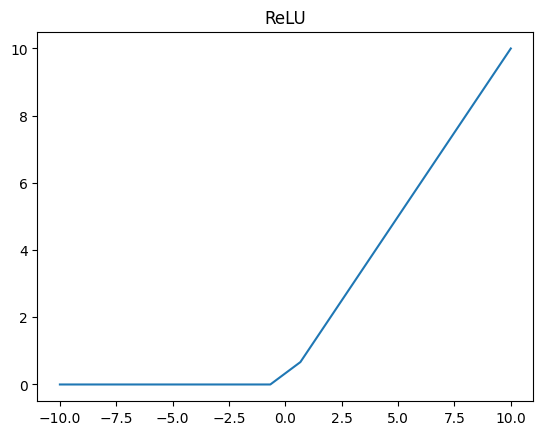

In [292]:
a = a.reshape(a.size)
plot_graph(a, ReLU(a), 'ReLU')

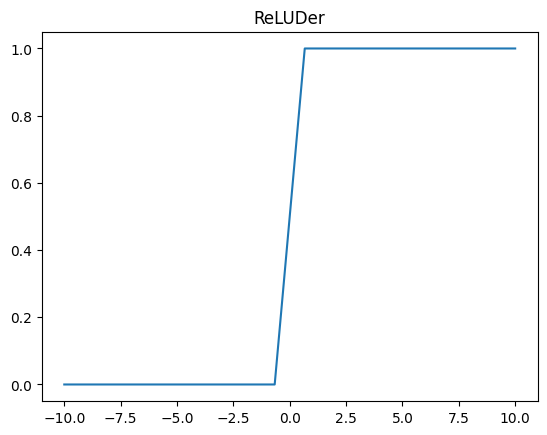

In [293]:
plot_graph(a, ReLU_der(a), 'ReLUDer')

2. ReLU6
$$ f(z)=min(max(0, z), 6) $$
$$ {f}'(z)=\left\{\begin{matrix}
 1 &z>0 \\ 
 0 & z>=6, z<=0 
\end{matrix}\right. $$

In [294]:
def ReLU6(arr: np.ndarray) -> np.ndarray:
    return np.minimum( np.maximum(0, arr), 6)

def ReLU6_der(arr: np.ndarray) -> np.ndarray:
    return np.where(0 < arr, 1, 0) * np.where(6 > arr, 1, 0)

In [295]:
ReLU6(a)

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.66666667, 2.        ,
       3.33333333, 4.66666667, 6.        , 6.        , 6.        ,
       6.        ])

In [296]:
ReLU6_der(a)

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0])

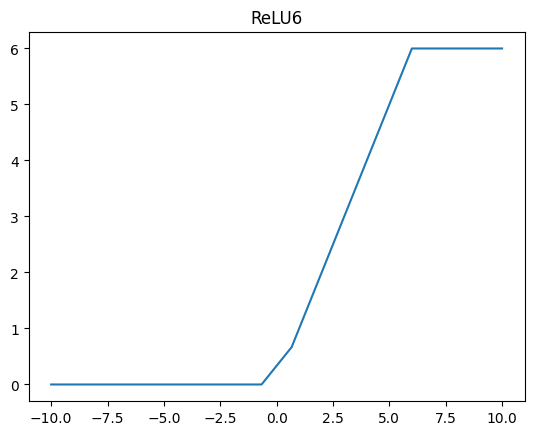

In [297]:
plot_graph(a, ReLU6(a), 'ReLU6')

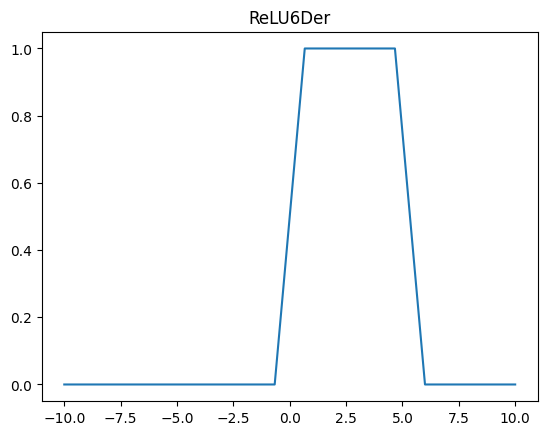

In [298]:
plot_graph(a, ReLU6_der(a), 'ReLU6Der')

3. SiLU
$$ f(z)=z/(1+{e}^{-z})=z\sigma(z) $$
$$ {f}'(z)= \sigma(z) + z\sigma(z)(1-\sigma(z)) $$

In [299]:
def SiLU(arr: np.ndarray) -> np.ndarray:
    return arr  / (1 + np.exp(-arr))

def SiLU_der(arr: np.ndarray) -> np.ndarray:
    sigma = 1/(1 + np.exp(-arr))
    return sigma + arr*sigma*(1-sigma)

In [300]:
SiLU(a)

array([-4.53978687e-04, -1.49242251e-03, -4.78841248e-03, -1.48357389e-02,
       -4.34744769e-02, -1.14817319e-01, -2.38405844e-01, -2.26162421e-01,
        4.40504246e-01,  1.76159416e+00,  3.21851601e+00,  4.62319219e+00,
        5.98516426e+00,  7.32854492e+00,  8.66517424e+00,  9.99954602e+00])

In [301]:
SiLU_der(a)

array([-4.08560209e-04, -1.31996291e-03, -4.13232047e-03, -1.23264326e-02,
       -3.37535111e-02, -7.64172182e-02, -9.07842488e-02,  1.89805371e-01,
        8.10194629e-01,  1.09078425e+00,  1.07641722e+00,  1.03375351e+00,
        1.01232643e+00,  1.00413232e+00,  1.00131996e+00,  1.00040856e+00])

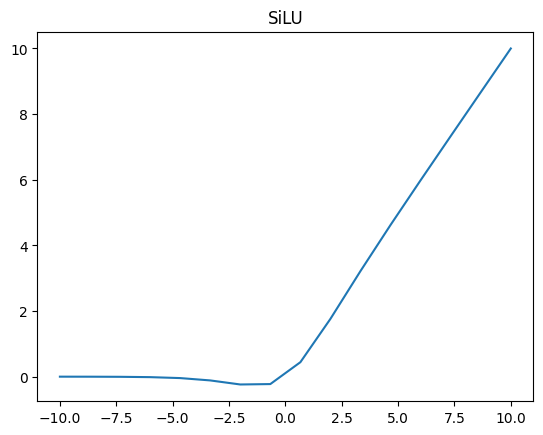

In [302]:
plot_graph(a, SiLU(a), 'SiLU')

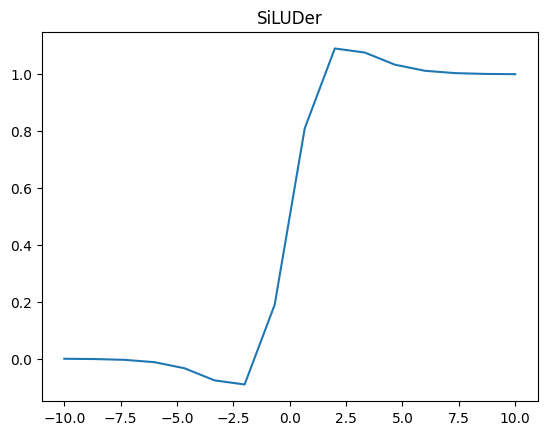

In [303]:
plot_graph(a, SiLU_der(a), 'SiLUDer')

4. Mish
$$ f(z)=z*tg(ln(1+{e}^{z})) $$
$$ {f}'(z)={e}^{z}\omega{\delta}^{2} $$
$$ \omega = {e}^{3z}+4{e}^{2z} + (6+4z){e}^{z} + 4(1+z) $$
$$ \delta = { ({e}^{z}+1) }^{2}+1 $$ 

In [304]:
def Mish(arr: np.ndarray) ->  np.ndarray:
    return arr * np.tanh(np.log(1 + np.exp(arr)))

def Mish_der(arr: np.ndarray) -> np.ndarray:
    omega = np.exp(3*arr) + 4*np.exp(2*arr) + (6+4*arr)*np.exp(arr) + 4*(1 + arr)
    delta = 1 + pow((np.exp(arr) + 1), 2)
    derivative = np.exp(arr) * omega / pow(delta, 2)
    return derivative

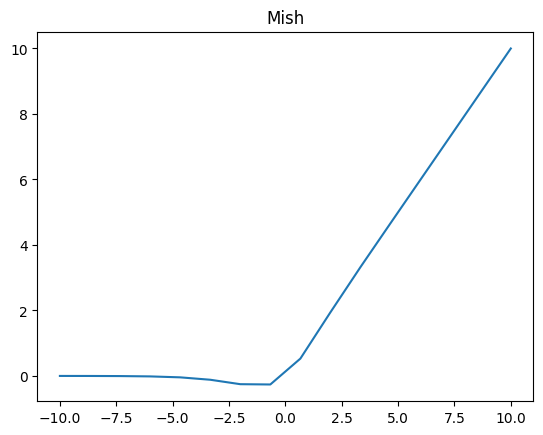

In [305]:
plot_graph(a, Mish(a), 'Mish')

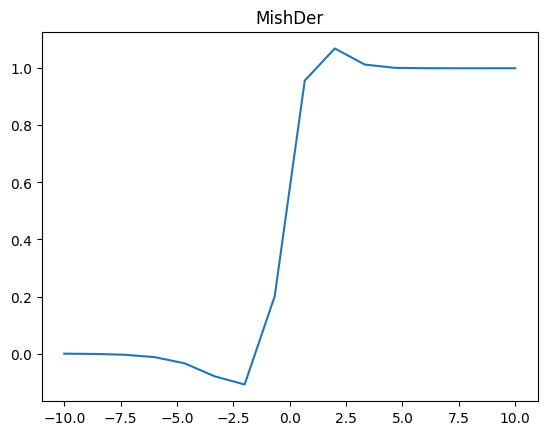

In [306]:
plot_graph(a, Mish_der(a), 'MishDer')

5. PReLu
$$ f(z)=\left\{\begin{matrix}
 z &z>0 \\ 
 az & z<=0
\end{matrix}\right. $$
$$ {f}'(z)=\left\{\begin{matrix}
 1 &z>0 \\ 
 a & z<=0
\end{matrix}\right. $$

In [307]:
def PReLu(arr: np.ndarray, alpha: int=0.1) -> np.ndarray:
    return np.where(arr > 0, arr, alpha * arr)

def PReLu_der(arr: np.ndarray, alpha: int=0.1) -> np.ndarray:
    return np.where(arr > 0, 1, alpha)

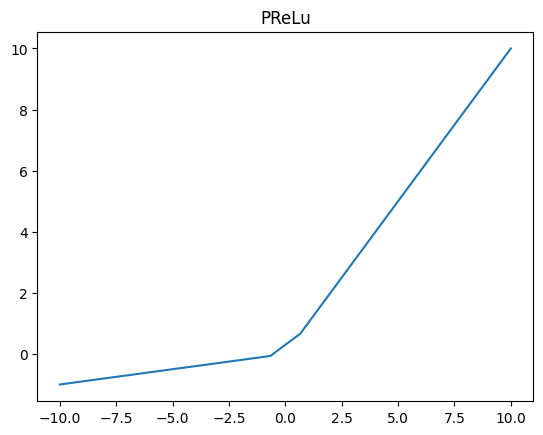

In [308]:
plot_graph(a, PReLu(a), 'PReLu')

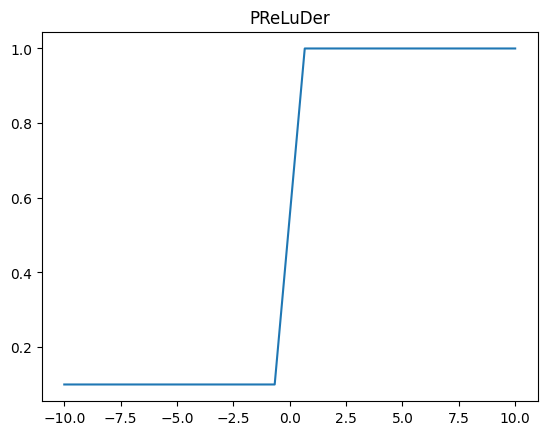

In [309]:
plot_graph(a, PReLu_der(a), 'PReLuDer')

## Losses

1. SE
$$ L(y, \widehat{y})=\sqrt{{y}^2-{\widehat{y}}^2}

In [310]:
def SE(actual: np.ndarray, pred: np.ndarray) -> np.ndarray:
    return np.square(np.subtract(actual, pred))

In [311]:
SE(a, ReLU(a))

array([100.        ,  75.11111111,  53.77777778,  36.        ,
        21.77777778,  11.11111111,   4.        ,   0.44444444,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ])

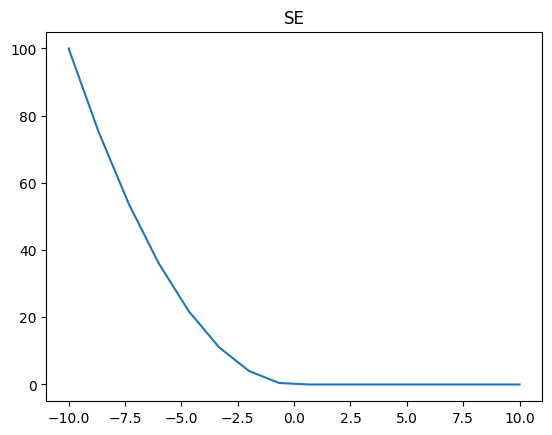

In [312]:
plot_graph(a, SE(a, ReLU(a)), "SE")

2. L1
$$ L(y, \widehat{y})=|{y}-{\widehat{y}}| $$

In [313]:
def L1(actual: np.ndarray, pred: np.ndarray) -> np.ndarray:
    return np.abs(actual - pred)

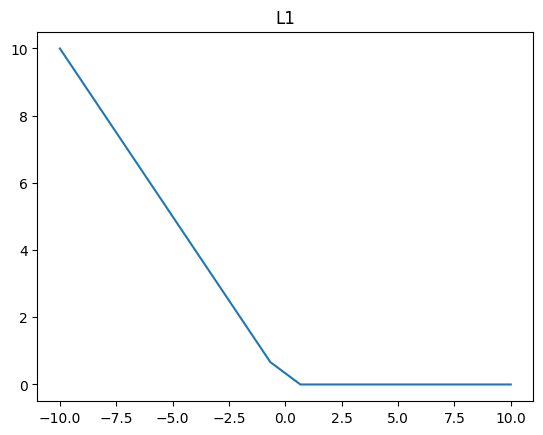

In [314]:
plot_graph(a, L1(a, ReLU(a)), "L1")

3. CE
$$ L(y, \widehat{y})=-y\log(\widehat{y}) - (1-y)\log(1-\widehat{y}) $$

In [315]:
def CE(actual: np.ndarray, pred: np.ndarray) -> np.ndarray:
    term_0 = (1 - actual) * np.log(1 - pred + 1e-7)
    term_1 = actual * np.log(pred + 1e-7)
    return -(term_0+term_1)

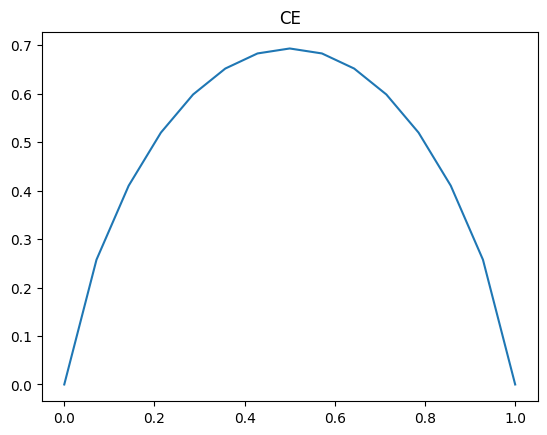

In [316]:
b = np.linspace(0, 1, 15)
plot_graph(b, CE(b, ReLU(b)), "CE")